In [1]:
import pandas as pd
import numpy as np

In [84]:
df=pd.read_csv(r"D:\datasets\netflix\netflix_userbase.csv")
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            70 non-null     int64 
 1   Subscription Type  70 non-null     object
 2   Monthly Revenue    70 non-null     int64 
 3   Join Date          70 non-null     object
 4   Last Payment Date  70 non-null     object
 5   Country            70 non-null     object
 6   Age                70 non-null     int64 
 7   Gender             70 non-null     object
 8   Device             70 non-null     object
 9   Plan Duration      70 non-null     object
dtypes: int64(3), object(7)
memory usage: 5.6+ KB


In [27]:
df[(df['Subscription Type']=='Premium')]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
5,6,Premium,15,2022-03-18,2023-06-27,France,29,Female,Smart TV,1 Month
9,10,Premium,15,2023-01-07,2023-06-22,Italy,44,Female,Smart TV,1 Month
11,12,Premium,15,2023-03-23,2023-06-28,Canada,45,Male,Tablet,1 Month
15,16,Premium,15,2022-04-07,2023-06-27,France,36,Male,Tablet,1 Month
18,19,Premium,15,2023-02-15,2023-06-23,Spain,32,Female,Smart TV,1 Month
20,21,Premium,15,2023-06-10,2023-06-22,United States,26,Female,Laptop,1 Month
25,26,Premium,15,2022-01-12,2023-06-27,France,29,Male,Smartphone,1 Month
28,29,Premium,15,2022-12-19,2023-06-23,Spain,36,Female,Laptop,1 Month
30,31,Premium,15,2023-02-03,2023-06-22,United States,28,Female,Smart TV,1 Month


In [10]:
df['User ID'].is_unique

True

In [62]:
#df['User ID']=df['User ID'].astype('int16')
#df['Join Date']=pd.to_datetime(df['Join Date'])
#df['Last Payment Date']=pd.to_datetime(df['Last Payment Date'],errors='coerce')
#df['Subscription Type']=df['Subscription Type'].astype('category')
#df['Device']=df['Device'].astype('category')
df['Total_months'] = (
    (df['Last Payment Date'].dt.year - df['Join Date'].dt.year) * 12 +
    (df['Last Payment Date'].dt.month - df['Join Date'].dt.month)
)
df["total_revenue"]=df['Total_months']*df["Monthly Revenue"]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            70 non-null     int16         
 1   Subscription Type  70 non-null     category      
 2   Monthly Revenue    70 non-null     int64         
 3   Join Date          70 non-null     datetime64[ns]
 4   Last Payment Date  70 non-null     datetime64[ns]
 5   Country            70 non-null     object        
 6   Age                70 non-null     int64         
 7   Gender             70 non-null     category      
 8   Device             70 non-null     category      
 9   Plan Duration      70 non-null     object        
 10  Total_months       70 non-null     int32         
 11  total_revenue      70 non-null     int64         
dtypes: category(3), datetime64[ns](2), int16(1), int32(1), int64(3), object(2)
memory usage: 5.0+ KB


In [22]:
df['Plan Duration'].unique()
df['Last Payment Date'].str.contains('2023-06').value_counts()

Last Payment Date
True    70
Name: count, dtype: int64

In [28]:
df['Subscription Type'].unique()
df['Monthly Revenue'].unique()

array([10, 15, 12], dtype=int64)

In [52]:
df['Country'].unique()
df['Country'].value_counts()
df['Device'].unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [65]:
df.sample(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Total_months,total_revenue
24,25,Basic,10,2023-03-14,2023-06-28,Germany,40,Female,Laptop,1 Month,3,30
13,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,10,100
37,38,Standard,12,2021-11-05,2023-06-24,Mexico,32,Male,Smartphone,1 Month,19,228
23,24,Standard,12,2022-04-03,2023-06-26,Australia,31,Male,Tablet,1 Month,14,168
26,27,Basic,10,2022-08-29,2023-06-25,Brazil,47,Female,Smart TV,1 Month,10,100
69,70,Basic,10,2023-05-08,2023-06-22,Italy,41,Male,Smartphone,1 Month,1,10
27,28,Standard,12,2021-09-27,2023-06-24,Mexico,33,Male,Tablet,1 Month,21,252
16,17,Basic,10,2022-01-24,2023-06-25,Brazil,30,Female,Laptop,1 Month,17,170
8,9,Standard,12,2022-10-20,2023-06-23,Spain,37,Male,Smartphone,1 Month,8,96
67,68,Standard,12,2021-11-09,2023-06-24,Mexico,33,Male,Tablet,1 Month,19,228


In [ ]:
#people prefer netflix  basic package for smartphones
#people prefer premium packages for smart TV
#for standerd packages Tabs are more preferable
#In total revenue contribution  standard package dominates it has 46.0% shares
#in our datset each country has equal distribution and even each gender has equal contribution
#also even each country has equal number of subscription type in each category

In [69]:
#EDA 
import matplotlib.pyplot as plt
df.pivot_table(index='Subscription Type',columns='Device',values='Monthly Revenue',aggfunc='sum')
df.pivot_table(index='Subscription Type',columns='Device',values='User ID',aggfunc='count')

C:\Users\HP\AppData\Local\Temp\ipykernel_13912\267186693.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Subscription Type',columns='Device',values='Monthly Revenue',aggfunc='sum')
C:\Users\HP\AppData\Local\Temp\ipykernel_13912\267186693.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Subscription Type',columns='Device',values='User ID',aggfunc='count')


Device,Laptop,Smart TV,Smartphone,Tablet
Subscription Type,,,,
Basic,7,5,10,5
Premium,6,7,3,5
Standard,4,5,6,7


C:\Users\HP\AppData\Local\Temp\ipykernel_13912\560220589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Subscription Type")['total_revenue'].sum().plot(kind='pie',autopct="%0.1f%%")


<Axes: ylabel='total_revenue'>

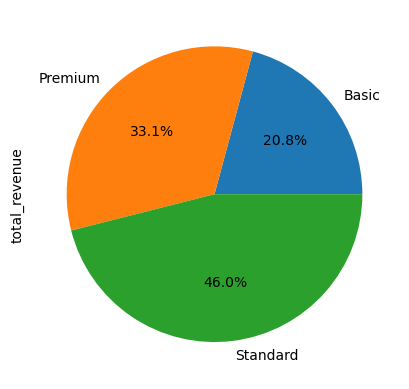

In [76]:
df.groupby("Subscription Type")['total_revenue'].sum().plot(kind='pie',autopct="%0.1f%%")

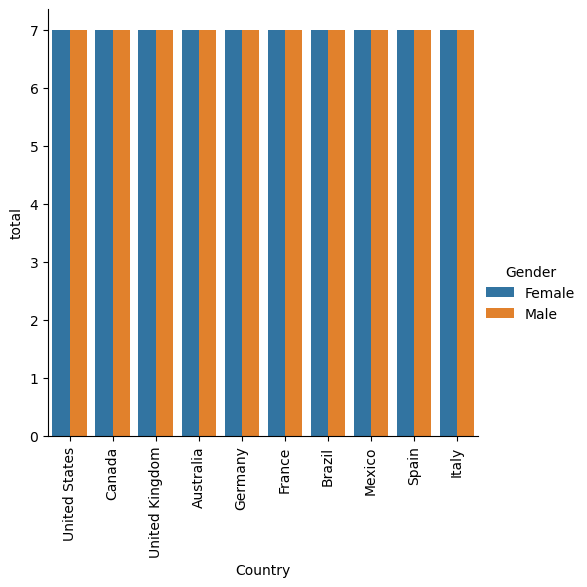

In [82]:
import seaborn as sns
df1 = df.copy()
df1['total'] = df['Country'].map(df['Country'].value_counts())
sns.catplot(kind='bar',data=df1,x='Country',y='total',hue='Gender')
plt.xticks(rotation=90)
plt.show()

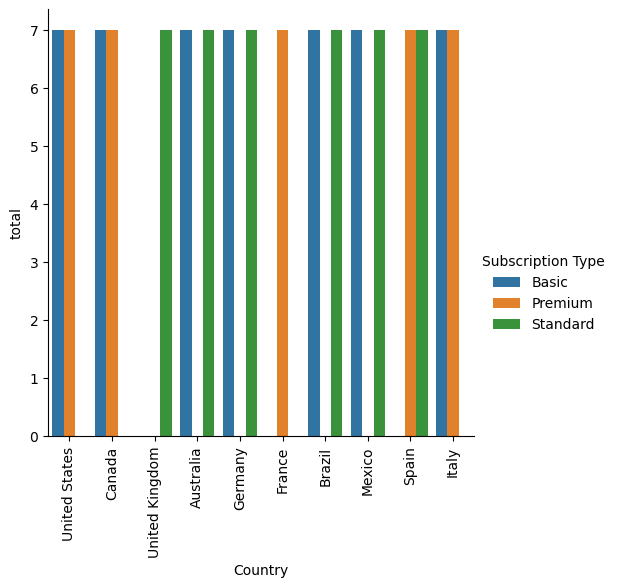

In [83]:
import seaborn as sns
df1 = df.copy()
df1['total'] = df['Country'].map(df['Country'].value_counts())
sns.catplot(kind='bar',data=df1,x='Country',y='total',hue='Subscription Type')
plt.xticks(rotation=90)
plt.show()